<a href="https://colab.research.google.com/github/kunalkishanmehta/ns-struc-dm/blob/master/Copy_of_Constrain_DM_NS_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### CONSTRAIN_DM_NS_MODELS.IPYNB -- Compare neutron star mass-radius relations with different DM fractions to observed mass-radius measurements

In [1]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.interpolate import interp1d

In [2]:
# # download the ns-struc-dm repository

# ! git clone https://github.com/kunalkishanmehta/ns-struc-dm.git`

In [ ]:
# download and install the code

%%bash
# make this cell an instance of a terminal

git clone https://github.com/kunalkishanmehta/ns-struc-dm.git # download code repository from https://github.com/landryp/ns-struc/tree/enthalpy
python2 -m pip install scipy

mkdir /opt/bin /opt/lib/ /opt/lib/python2.7 /opt/lib/python2.7/site-packages # create install directory and make it findable
export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

cd /content/ns-struc-dm # install code
python2 setup.py install --prefix /opt/

echo -e '\n *** \n'

getnsprops -h # this is the executable from ns-struc that solves the TOV equations to compute neutron star observables; print its help string to see the syntax for calling it

echo -e '\n *** \n'

In [ ]:
%%bash
export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

cd /content/ns-struc-dm # install code
git pull
python2 setup.py install --prefix /opt/



In [12]:
import zipfile
# with zipfile.ZipFile('/content/ns-struc-dm/file/sly.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content')

with zipfile.ZipFile('/content/ns-struc-dm/file/stable_m_r_sly.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

with zipfile.ZipFile('/content/ns-struc-dm/file/stable_m_r_mpa1.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

with zipfile.ZipFile('/content/ns-struc-dm/file/stable_m_r_hqc18.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

# with zipfile.ZipFile('/content/ns-struc-dm/file/mpa1.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content')

In [14]:
stable_m_r_sly = []
stable_m_r_mpa1 = []
stable_m_r_hqc18 = []
for i in range(9):
  stable_m_r_sly.append(np.genfromtxt('/content/stable_m_r_sly_{}.csv'.format(i),delimiter=',',names=True,dtype=None))
  stable_m_r_mpa1.append(np.genfromtxt('/content/stable_m_r_mpa1_{}.csv'.format(i),delimiter=',',names=True,dtype=None))
  stable_m_r_hqc18.append(np.genfromtxt('/content/stable_m_r_hqc18_{}.csv'.format(i),delimiter=',',names=True,dtype=None))


In [ ]:

# data_con_mpa10 = np.genfromtxt('/content/macro_contour0mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa11 = np.genfromtxt('/content/macro_contour1mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa12 = np.genfromtxt('/content/macro_contour2mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa13 = np.genfromtxt('/content/macro_contour3mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa14 = np.genfromtxt('/content/macro_contour4mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa15 = np.genfromtxt('/content/macro_contour5mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa16 = np.genfromtxt('/content/macro_contour6mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa17 = np.genfromtxt('/content/macro_contour7mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa18 = np.genfromtxt('/content/macro_contour8mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa19 = np.genfromtxt('/content/macro_contour9mpa1.csv',delimiter=',',names=True,dtype=None)
# data_con_mpa110 = np.genfromtxt('/content/macro_contour10mpa1.csv',delimiter=',',names=True,dtype=None)

In [13]:
# load neutron star observations

j0030 = np.genfromtxt('ns-struc-dm/etc/Miller_J0030_three-spot.csv',names=True,delimiter=',',dtype=None) # psr j0030 mass and radius
j0740 = np.genfromtxt('ns-struc-dm/etc/Miller_J0740_nominal-XMM.csv',names=True,delimiter=',',dtype=None) # psr j0740 mass and radius

gw170817 = np.genfromtxt('ns-struc-dm/etc/LVC_GW170817_PhenomPNRT-lo.csv',names=True,delimiter=',',dtype=None) # gw170817 masses and tidal deformabilities
gw190425 = np.genfromtxt('ns-struc-dm/etc/LVC_GW190425_PhenomPNRT-hi.csv',names=True,delimiter=',',dtype=None) # gw190425 masses and tidal deformabilities

In [15]:
# convert tidal deformability to radius using a fit based on many different equations of state

c = 2.998e10 # speed of light
G = 6.6743e-9 # Newton's constant
Msun = 1.988435e33 # solar mass

def C(L): # fit to compactness Gm/c^2 R in terms of tidal deformability from arxiv:1608.02582

  return 0.360 - 0.0355*np.log(L) + 0.001056*np.log(L)**2

R1_gw170817 = [1e-4*(G/c**2)*m1*Msun/C(L1) for m1,L1 in zip(gw170817['m1'],gw170817['Lambda1'])]
R2_gw170817 = [1e-4*(G/c**2)*m2*Msun/C(L2) for m2,L2 in zip(gw170817['m2'],gw170817['Lambda2'])]

R1_gw190425 = [1e-4*(G/c**2)*m1*Msun/C(L1) for m1,L1 in zip(gw190425['m1'],gw190425['Lambda1'])]
R2_gw190425 = [1e-4*(G/c**2)*m2*Msun/C(L2) for m2,L2 in zip(gw190425['m2'],gw190425['Lambda2'])]

In [19]:
# load mass-radius tables for neutron stars containing dark matter

sly_dm = np.genfromtxt('ns-struc-dm/file/macro-sly.csv',names=True,delimiter=',',dtype=None) # sly equation of state
mpa1_dm = np.genfromtxt('ns-struc-dm/file/macro-mpa1.csv',names=True,delimiter=',',dtype=None) # mpa1 equation of state
hqc18_dm = np.genfromtxt('ns-struc-dm/file/macro-hqc18.csv',names=True,delimiter=',',dtype=None) # hqc18 equation of state

In [17]:
data_colours = ['b','orange','y','c','m','indigo','pink','lime','brown']
data_frac = [10,20,30,40,50,60,70,80,90]

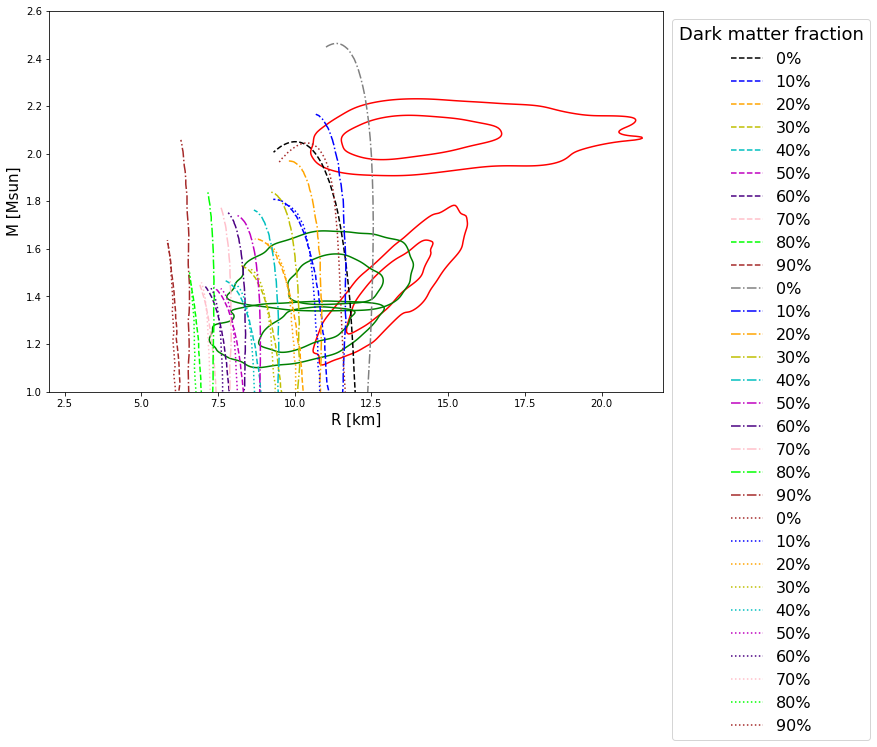

In [41]:
# overlay the mass-radius relations for the equations of state on top of the mass-radius measurements
plt.figure(figsize= (11,7))


sns.kdeplot(x=j0030['R'],y=j0030['m'],weights=j0030['likelihood']/np.sum(j0030['likelihood']),levels=[0.1,0.5],color='r')
sns.kdeplot(x=j0740['R'],y=j0740['m'],weights=j0740['likelihood']/np.sum(j0740['likelihood']),levels=[0.1,0.5],color='r')

sns.kdeplot(x=R1_gw170817,y=gw170817['m1'],weights=gw170817['likelihood']/np.sum(gw170817['likelihood']),levels=[0.1,0.5],color='g')
sns.kdeplot(x=R2_gw170817,y=gw170817['m2'],weights=gw170817['likelihood']/np.sum(gw170817['likelihood']),levels=[0.1,0.5],color='g')

# sns.kdeplot(x=R1_gw190425,y=gw190425['m1'],weights=gw190425['likelihood']/np.sum(gw190425['likelihood']),levels=[0.1,0.5],color='g') # skip gw190425 for now because it's so uninformative
# sns.kdeplot(x=R2_gw190425,y=gw190425['m2'],weights=gw190425['likelihood']/np.sum(gw190425['likelihood']),levels=[0.1,0.5],color='g')

plt.plot(sly_dm['R'][::48],sly_dm['Mg'][::48],c='k', label = '0%', ls = '--')
for i,j,k in zip(range(9),data_frac,data_colours):
  plt.plot(stable_m_r_sly[i]['R'],stable_m_r_sly[i]['M'], label = '{}%'.format(j), c = k, ls = '--')

# plt.plot(stable_m_r_sly[0]['R'],stable_m_r_sly[0]['M'], label = '10%', c = 'y')
# plt.plot(stable_m_r_sly[1]['R'], stable_m_r_sly[1]['M'], label = '20%', c = 'orange')
#plt.plot(sly_dm['R'][10::48],sly_dm['Mg'][10::48],c='k',ls='--') # replace these with constant DM fraction curves
#plt.plot(sly_dm['R'][20::48],sly_dm['Mg'][20::48],c='k',ls='--')
#plt.plot(sly_dm['R'][30::48],sly_dm['Mg'][30::48],c='k',ls='--')
#plt.plot(sly_dm['R'][40::48],sly_dm['Mg'][40::48],c='k',ls='--')

plt.plot(mpa1_dm['R'][::48],mpa1_dm['Mg'][::48],c='grey',label = '0%', ls = 'dashdot')
for i,j,k in zip(range(9),data_frac,data_colours):
  plt.plot(stable_m_r_mpa1[i]['R'],stable_m_r_mpa1[i]['M'], label = '{}%'.format(j), c = k, ls = 'dashdot')

# plt.plot(data_con_mpa10['R'],data_con_mpa10['Mg'], label = '1%', c = 'r')
# plt.plot(data_con_mpa11['R'],data_con_mpa11['Mg'], label = '10%', c = 'y')
# plt.plot(data_con_mpa12['R'],data_con_mpa12['Mg'], label = '20%', c = 'brown')
# plt.plot(data_con_mpa13['R'],data_con_mpa13['Mg'], label = '30%', c = 'lime')
# plt.plot(data_con_mpa14['R'],data_con_mpa14['Mg'], label = '40%', c = 'c')
#plt.plot(mpa1_dm['R'][10::48],mpa1_dm['Mg'][10::48],c='grey',ls='--') # replace these with constant DM fraction curves
#plt.plot(mpa1_dm['R'][20::48],mpa1_dm['Mg'][20::48],c='grey',ls='--')
#plt.plot(mpa1_dm['R'][30::48],mpa1_dm['Mg'][30::48],c='grey',ls='--')
#plt.plot(mpa1_dm['R'][40::48],mpa1_dm['Mg'][40::48],c='grey',ls='--')

plt.plot(hqc18_dm['R'][::48],hqc18_dm['Mg'][::48],c='brown', label = '0%', ls = ':')
for i,j,k in zip(range(9),data_frac,data_colours):
  plt.plot(stable_m_r_hqc18[i]['R'],stable_m_r_hqc18[i]['M'], label = '{}%'.format(j), c = k, ls = ':')

plt.xlim(2.,22.)
plt.ylim(1.,2.6)
plt.xlabel("R [km]", size =15)
plt.ylabel("M [Msun]", size =15)
plt.legend(bbox_to_anchor=(1.35, 1), fontsize = 16, title='Dark matter fraction',title_fontsize=18 )
plt.show()

In [43]:
# to quantify which equation of state and dark matter fraction is preferred by the data, compute Bayesian evidences; start by interpolating mass-radius measurements with a Gaussian kernel density estimate

j0030_kde = gaussian_kde(np.vstack((j0030['R'],j0030['m'])),weights=j0030['likelihood']/np.sum(j0030['likelihood'])) # returns a function that gives likelihood as a function of mass and radius
j0740_kde = gaussian_kde(np.vstack((j0740['R'],j0740['m'])),weights=j0740['likelihood']/np.sum(j0740['likelihood']))

gw170817_kde1 = gaussian_kde(np.vstack((R1_gw170817,gw170817['m1'])),weights=gw170817['likelihood']/np.sum(gw170817['likelihood']))
gw170817_kde2 = gaussian_kde(np.vstack((R2_gw170817,gw170817['m2'])),weights=gw170817['likelihood']/np.sum(gw170817['likelihood']))

gw190425_kde1 = gaussian_kde(np.vstack((R1_gw190425,gw190425['m1'])),weights=gw190425['likelihood']/np.sum(gw190425['likelihood']))
gw190425_kde2 = gaussian_kde(np.vstack((R2_gw190425,gw190425['m2'])),weights=gw190425['likelihood']/np.sum(gw190425['likelihood']))

In [76]:
data_frac2 = [0,10,20,30,40,50,60,70,80,90]

In [62]:
# now interpolate equation of state's mass-radius relation, up to maximum mass, and calculate Bayesian evidence for that equation of state
compare_sly = []

mmax = max(sly_dm['Mg'][::48])
pos = list(sly_dm['Mg'][::48]).index(mmax)
radius = interp1d(sly_dm['Mg'][::48][:pos+1],sly_dm['R'][::48][:pos+1],bounds_error=False,fill_value = 0.) # returns a function that gives radius as a function of mass

# evidence = integral[ likelihood(observation | m,R) * probability(m,R | eos) dm dR ], where likelihood is the kde and probability is a delta function in R(m) for the eos
# evidence_tot = evidence1*evidence2*...
# use Monte Carlo approximation of integral: integral[... dm] = sum[... for m in uniform_m]/num_m

j0030_like = np.sum([j0030_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0030 mass and radius, given equation of state
j0740_like = np.sum([j0740_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0740 mass and radius, given equation of state
like_0 = j0030_like*j0740_like # evidence for equation of state from psr observations


gw170817_like1 = np.sum([gw170817_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 primary mass and radius, given equation of state
gw170817_like2 = np.sum([gw170817_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 secondary mass and radius, given equation of state
#gw190425_like1 = np.sum([gw190425_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 primary mass and radius, given equation of state
#gw190425_like2 = np.sum([gw190425_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 secondary mass and radius, given equation of state
like_01 = gw170817_like1*gw170817_like2#*gw190425_like1*gw190425_like2 # evidence for equation of state from gw observations # skip gw190425 for now because it's so uninformative

compare_sly.append((like_0,like_01))

In [63]:
# now interpolate equation of state's mass-radius relation, up to maximum mass, and calculate Bayesian evidence for that equation of state
# stable_m_r_sly_0 = np.genfromtxt('/content/stable_m_r_sly_0.csv',delimiter=',',names=True,dtype=None)

for i in range(9):

  radius = interp1d(stable_m_r_sly[i]['M'],stable_m_r_sly[i]['R'],bounds_error=False,fill_value = 0.) # returns a function that gives radius as a function of mass

# evidence = integral[ likelihood(observation | m,R) * probability(m,R | eos) dm dR ], where likelihood is the kde and probability is a delta function in R(m) for the eos
# evidence_tot = evidence1*evidence2*...
# use Monte Carlo approximation of integral: integral[... dm] = sum[... for m in uniform_m]/num_m

  j0030_like = np.sum([j0030_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0030 mass and radius, given equation of state
  j0740_like = np.sum([j0740_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0740 mass and radius, given equation of state
  like = j0030_like*j0740_like # evidence for equation of state from psr observations
  

  gw170817_like1 = np.sum([gw170817_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 primary mass and radius, given equation of state
  gw170817_like2 = np.sum([gw170817_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 secondary mass and radius, given equation of state
#gw190425_like1 = np.sum([gw190425_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 primary mass and radius, given equation of state
#gw190425_like2 = np.sum([gw190425_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 secondary mass and radius, given equation of state
  like2 = gw170817_like1*gw170817_like2#*gw190425_like1*gw190425_like2 # evidence for equation of state from gw observations # skip gw190425 for now because it's so uninformative
  
  compare_sly.append((like,like2))
compare_sly = np.array(compare_sly)

In [117]:
frac_compare_sly = []

for i in range(10):
  frac_compare_sly.append(compare_sly[0]/compare_sly[i])
frac_compare_sly = np.array(frac_compare_sly)


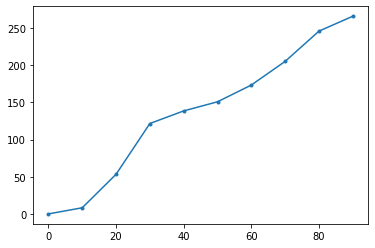

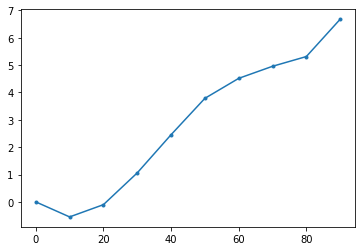

In [118]:
plt.plot(data_frac2, np.log(frac_compare_sly[:,0]), marker = '.')
plt.show()
plt.plot(data_frac2, np.log(frac_compare_sly[:,1]), marker = '.')
plt.show()

In [66]:
# now interpolate equation of state's mass-radius relation, up to maximum mass, and calculate Bayesian evidence for that equation of state
compare_mpa1 = []

mmax = max(mpa1_dm['Mg'][::48])
pos = list(mpa1_dm['Mg'][::48]).index(mmax)
radius = interp1d(mpa1_dm['Mg'][::48][:pos+1],mpa1_dm['R'][::48][:pos+1],bounds_error=False,fill_value = 0.) # returns a function that gives radius as a function of mass

# evidence = integral[ likelihood(observation | m,R) * probability(m,R | eos) dm dR ], where likelihood is the kde and probability is a delta function in R(m) for the eos
# evidence_tot = evidence1*evidence2*...
# use Monte Carlo approximation of integral: integral[... dm] = sum[... for m in uniform_m]/num_m

j0030_like = np.sum([j0030_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0030 mass and radius, given equation of state
j0740_like = np.sum([j0740_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0740 mass and radius, given equation of state
like_0 = j0030_like*j0740_like # evidence for equation of state from psr observations


gw170817_like1 = np.sum([gw170817_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 primary mass and radius, given equation of state
gw170817_like2 = np.sum([gw170817_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 secondary mass and radius, given equation of state
#gw190425_like1 = np.sum([gw190425_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 primary mass and radius, given equation of state
#gw190425_like2 = np.sum([gw190425_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 secondary mass and radius, given equation of state
like_01 = gw170817_like1*gw170817_like2#*gw190425_like1*gw190425_like2 # evidence for equation of state from gw observations # skip gw190425 for now because it's so uninformative

compare_mpa1.append((like_0,like_01))

In [67]:
# from this, conclude that pulsar measurements favour mpa1 over sly by factor of 0.0123/0.0006 = 20, but gw measurements favor sly over mpa1 by factor of 0.0088/0.0024 = 4; can do the same calculation for zero vs non-zero DM fraction

In [68]:
# now interpolate equation of state's mass-radius relation, up to maximum mass, and calculate Bayesian evidence for that equation of state
# stable_m_r_mpa1_0 = np.genfromtxt('/content/stable_m_r_mpa1_0.csv',delimiter=',',names=True,dtype=None)

for i in range(9):

  radius = interp1d(stable_m_r_mpa1[i]['M'],stable_m_r_mpa1[i]['R'],bounds_error=False,fill_value = 0.) # returns a function that gives radius as a function of mass

# evidence = integral[ likelihood(observation | m,R) * probability(m,R | eos) dm dR ], where likelihood is the kde and probability is a delta function in R(m) for the eos
# evidence_tot = evidence1*evidence2*...
# use Monte Carlo approximation of integral: integral[... dm] = sum[... for m in uniform_m]/num_m

  j0030_like = np.sum([j0030_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0030 mass and radius, given equation of state
  j0740_like = np.sum([j0740_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0740 mass and radius, given equation of state
  like = j0030_like*j0740_like # evidence for equation of state from psr observations
  

  gw170817_like1 = np.sum([gw170817_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 primary mass and radius, given equation of state
  gw170817_like2 = np.sum([gw170817_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 secondary mass and radius, given equation of state
#gw190425_like1 = np.sum([gw190425_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 primary mass and radius, given equation of state
#gw190425_like2 = np.sum([gw190425_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 secondary mass and radius, given equation of state
  like2 = gw170817_like1*gw170817_like2#*gw190425_like1*gw190425_like2 # evidence for equation of state from gw observations # skip gw190425 for now because it's so uninformative
  
  compare_mpa1.append((like,like2))
compare_mpa1 = np.array(compare_mpa1)

In [69]:
frac_compare_mpa1 = []

for i in range(10):
  frac_compare_mpa1.append(compare_mpa1[0]/compare_mpa1[i])
frac_compare_mpa1 = np.array(frac_compare_mpa1)


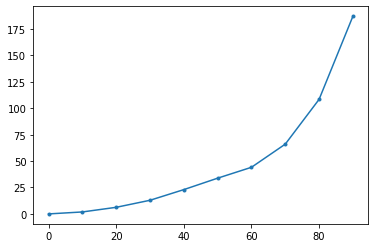

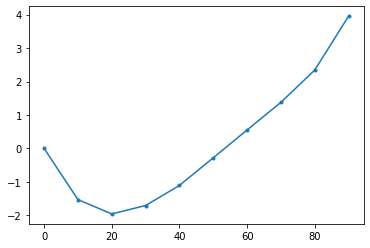

In [79]:
plt.plot(data_frac2,np.log(frac_compare_mpa1[:,0]), marker = '.')
plt.show()
plt.plot(data_frac2,np.log(frac_compare_mpa1[:,1]), marker = '.')
plt.show()

In [126]:
compare_mpa1[0]/compare_sly[0]

array([20.49271164,  0.27384568])

In [71]:
# now interpolate equation of state's mass-radius relation, up to maximum mass, and calculate Bayesian evidence for that equation of state
compare_hqc18 = []

mmax = max(hqc18_dm['Mg'][::48])
pos = list(hqc18_dm['Mg'][::48]).index(mmax)
radius = interp1d(hqc18_dm['Mg'][::48][:pos+1],hqc18_dm['R'][::48][:pos+1],bounds_error=False,fill_value = 0.) # returns a function that gives radius as a function of mass

# evidence = integral[ likelihood(observation | m,R) * probability(m,R | eos) dm dR ], where likelihood is the kde and probability is a delta function in R(m) for the eos
# evidence_tot = evidence1*evidence2*...
# use Monte Carlo approximation of integral: integral[... dm] = sum[... for m in uniform_m]/num_m

j0030_like = np.sum([j0030_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0030 mass and radius, given equation of state
j0740_like = np.sum([j0740_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0740 mass and radius, given equation of state
like_0 = j0030_like*j0740_like # evidence for equation of state from psr observations


gw170817_like1 = np.sum([gw170817_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 primary mass and radius, given equation of state
gw170817_like2 = np.sum([gw170817_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 secondary mass and radius, given equation of state
#gw190425_like1 = np.sum([gw190425_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 primary mass and radius, given equation of state
#gw190425_like2 = np.sum([gw190425_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 secondary mass and radius, given equation of state
like_01 = gw170817_like1*gw170817_like2#*gw190425_like1*gw190425_like2 # evidence for equation of state from gw observations # skip gw190425 for now because it's so uninformative

compare_hqc18.append((like_0,like_01))

In [72]:
# now interpolate equation of state's mass-radius relation, up to maximum mass, and calculate Bayesian evidence for that equation of state
# stable_m_r_hqc18_0 = np.genfromtxt('/content/stable_m_r_hqc18_0.csv',delimiter=',',names=True,dtype=None)

for i in range(9):

  radius = interp1d(stable_m_r_hqc18[i]['M'],stable_m_r_hqc18[i]['R'],bounds_error=False,fill_value = 0.) # returns a function that gives radius as a function of mass

# evidence = integral[ likelihood(observation | m,R) * probability(m,R | eos) dm dR ], where likelihood is the kde and probability is a delta function in R(m) for the eos
# evidence_tot = evidence1*evidence2*...
# use Monte Carlo approximation of integral: integral[... dm] = sum[... for m in uniform_m]/num_m

  j0030_like = np.sum([j0030_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0030 mass and radius, given equation of state
  j0740_like = np.sum([j0740_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0740 mass and radius, given equation of state
  like = j0030_like*j0740_like # evidence for equation of state from psr observations
  

  gw170817_like1 = np.sum([gw170817_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 primary mass and radius, given equation of state
  gw170817_like2 = np.sum([gw170817_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 secondary mass and radius, given equation of state
#gw190425_like1 = np.sum([gw190425_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 primary mass and radius, given equation of state
#gw190425_like2 = np.sum([gw190425_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 secondary mass and radius, given equation of state
  like2 = gw170817_like1*gw170817_like2#*gw190425_like1*gw190425_like2 # evidence for equation of state from gw observations # skip gw190425 for now because it's so uninformative
  
  compare_hqc18.append((like,like2))
compare_hqc18 = np.array(compare_hqc18)

In [109]:
frac_compare_hqc18 = []

for i in range(10):
  frac_compare_hqc18.append(compare_hqc18[0]/compare_hqc18[i])
frac_compare_hqc18 = np.array(frac_compare_hqc18)

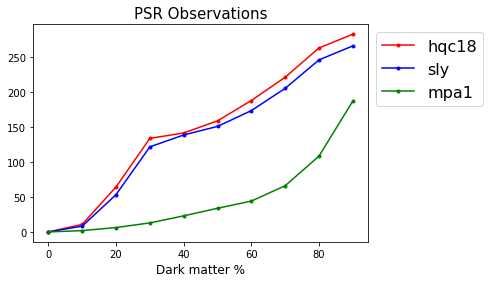

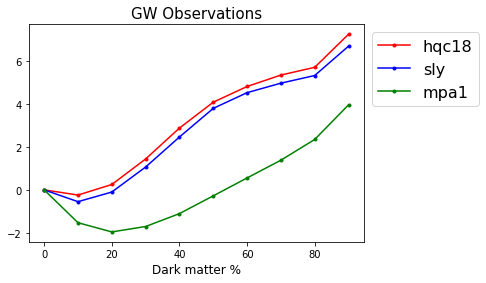

In [114]:
plt.plot(data_frac2,np.log(frac_compare_hqc18[:,0]), marker = '.', c = 'r', label = 'hqc18')
plt.plot(data_frac2, np.log(frac_compare_sly[:,0]), marker = '.', c = 'b', label = 'sly')
plt.plot(data_frac2,np.log(frac_compare_mpa1[:,0]), marker = '.', c = 'g', label = 'mpa1')
plt.xlabel('Dark matter %', size = 12)
plt.title('PSR Observations', size = 15)

plt.legend( bbox_to_anchor=(1, 1), fontsize = 16,title_fontsize=18 )


plt.show()

plt.plot(data_frac2,np.log(frac_compare_hqc18[:,1]), marker = '.', c = 'r',label = 'hqc18')
plt.plot(data_frac2, np.log(frac_compare_sly[:,1]), marker = '.', c= 'b', label = 'sly')
plt.plot(data_frac2,np.log(frac_compare_mpa1[:,1]), marker = '.', c = 'g', label = 'mpa1')
plt.xlabel('Dark matter %', size = 12)
plt.title('GW Observations', size = 15)

plt.legend( bbox_to_anchor=(1, 1), fontsize = 16,title_fontsize=18 )

plt.show()




In [139]:
frac_compare_sly_mpa1 = []
frac_compare_sly_hqc18 = []
for i in range(10):
  frac_compare_sly_mpa1.append(compare_mpa1[i]/compare_sly[i])
  frac_compare_sly_hqc18.append(compare_hqc18[i]/compare_sly[i])
frac_compare_sly_mpa1 = np.array(frac_compare_sly_mpa1)
frac_compare_sly_hqc18 = np.array(frac_compare_sly_hqc18)

In [127]:
compare_mpa1[0]/compare_sly[0]

array([20.49271164,  0.27384568])

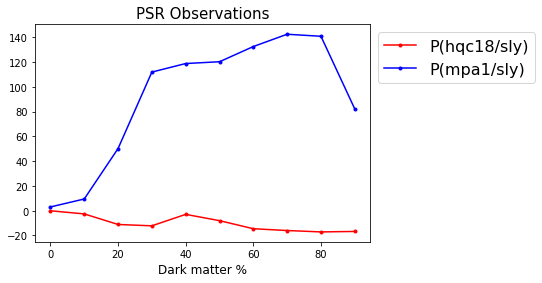

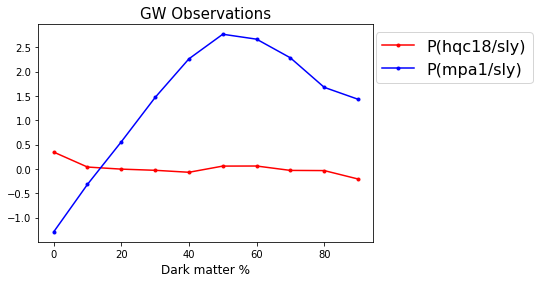

In [136]:
plt.plot(data_frac2,np.log(frac_compare_sly_hqc18[:,0]), marker = '.', label = 'P(hqc18/sly)', c = 'r')
plt.plot(data_frac2,np.log(frac_compare_sly_mpa1[:,0]), marker = '.', label = 'P(mpa1/sly)', c = 'b')
plt.legend( bbox_to_anchor=(1, 1), fontsize = 16,title_fontsize=18 )
plt.xlabel('Dark matter %', size = 12)
plt.title('PSR Observations', size = 15)

plt.show()

plt.plot(data_frac2,np.log(frac_compare_sly_hqc18[:,1]), marker = '.', label = 'P(hqc18/sly)', c = 'r')
plt.plot(data_frac2,np.log(frac_compare_sly_mpa1[:,1]), marker = '.', label = 'P(mpa1/sly)', c = 'b')

plt.legend(bbox_to_anchor=(1.5, 1), fontsize = 16,title_fontsize=18 )
plt.xlabel('Dark matter %', size = 12)
plt.title('GW Observations', size = 15)
plt.show()

2.995732273553991